In [62]:
import torch 
import torchvision
import cv2
import matplotlib.pyplot as plt

#### Download MNIT dataset using pytorch and set hyperparameters for the optimizer using later on

In [63]:
n_epochs = 10
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('MNIT_data/', train=True, download=True,
    transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('MNIT_data/', train=False, download=True,
    transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
    (0.1307,), (0.3081,))])),
    batch_size=batch_size_test, shuffle=True)

### Visualize data


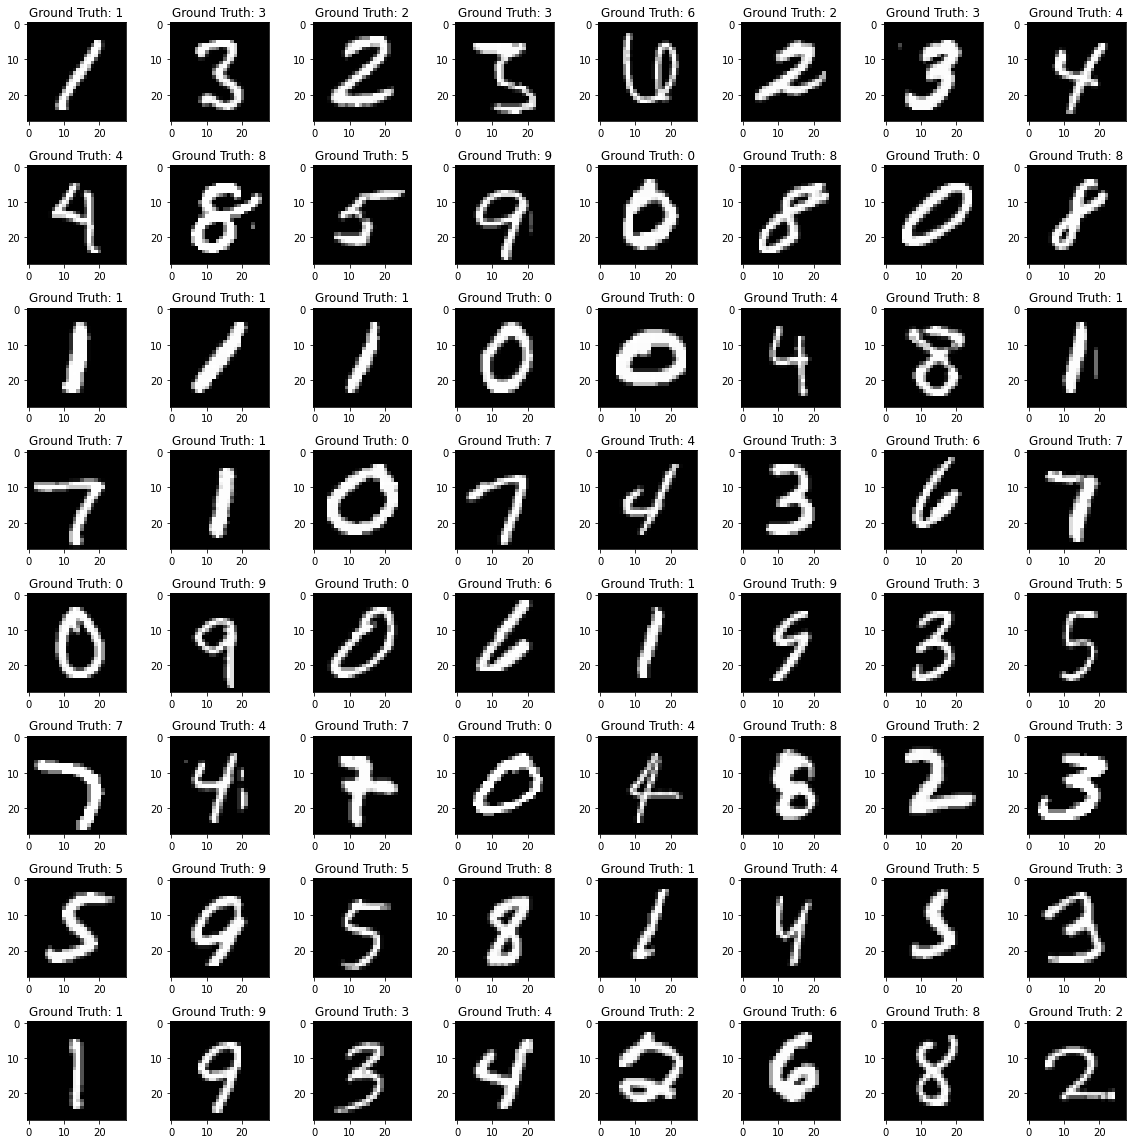

In [70]:
examples = enumerate(test_loader)
idx_batch, (examples_visualize, targets_visualize) = next(examples) 
rows, columns = 8, 8
fig = plt.figure(figsize=(rows*2,columns*2))
for i in range(rows*colums):
  plt.subplot(rows, columns,i+1)
  plt.tight_layout()
  plt.imshow(examples_visualize[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(targets_visualize[i]))


In [80]:
dict_ids = {}
for batch_id, (data, label) in enumerate(train_loader):
    for id in label.numpy():
        if id not in dict_ids:
            dict_ids[id] = 1
        else:
            dict_ids[id] += 1 

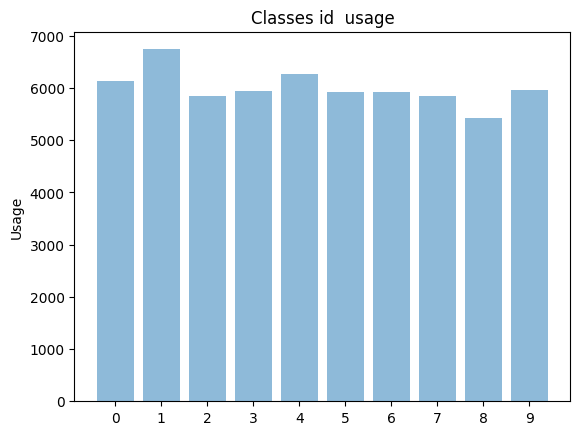

In [81]:
clasess = list(dict_ids)

objects = (0,1,2,3,4,5,6,7,8,9)

y_pos = np.arange(len(objects))

performance = []
for i in clasess:
    performance.append(dict_ids[i])

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Classes id  usage')

plt.show()